In [24]:
#   !pip install numpy

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv




In [26]:

#   USE ESPONENTIAL OR CONSTANT
use_exp = True

if use_exp == True:
    distribution = "Exp"
elif use_exp == False:
    distribution = "Con"

#   target_tso = ["50"]
detailed = True
if detailed == True :
    target_tso = list(range(24, 51+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30
use_all = True

target_tn = 30


# PROBABILITY
probability = 50

In [27]:
print(target_tso)

[24, 27, 30, 33, 36, 39, 42, 45, 48, 51]


In [28]:
#   run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,vectime,vecvalue

#   testS3ExpP50_24_all.csv

#   scalar,J_Network.server_0,completedJob:mean
#   target_tso = ["24"]
    
r1 = "scalar"
r2 = "J_Network.server_"
r3 = "completedJob:mean"
server_names = [0, 1]

general_array = []
for srvn in range(0, len(server_names)):
    jrespTime_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        #   print(tso_this_iter)
        jrespTime_all_this_tso = []
        file_name_csv = f'testS3{distribution}P{probability}_{target_tso[tso_this_iter]}_mean.csv'

        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    #   print("hit row : ", row)
                    #   hit row :  ['testExpP50-0-20240111-20:04:46-18804', 'scalar', 'J_Network.server_0', 'completedJob:mean', '', '', '2386.8933293034', '', '', '', '', '', '', '', '']
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    
                    this_row_mean = float( rigaTarget[6] )
                    jrespTime_all_this_tso.append(this_row_mean)
                    
                    print("mean : ", this_row_mean , " ; repetitions_counter : ", repetitions_counter)
                    repetitions_counter += 1
                    
                    if use_all == False:
                        print("break")
                        break
        
        jrespTime_all_tsos.append(jrespTime_all_this_tso)
        print(f'{file_name_csv} _ len : {len(jrespTime_all_tsos[tso_this_iter])}' )
    general_array.append(jrespTime_all_tsos)

mean :  2158.6705381035  ; repetitions_counter :  0
mean :  2262.3517663331  ; repetitions_counter :  1
mean :  2280.5449731429  ; repetitions_counter :  2
mean :  2135.4260196759  ; repetitions_counter :  3
mean :  2269.8002036097  ; repetitions_counter :  4
mean :  2020.3432465517  ; repetitions_counter :  5
mean :  2362.0875272727  ; repetitions_counter :  6
mean :  2232.3910813887  ; repetitions_counter :  7
mean :  2216.1191962134  ; repetitions_counter :  8
mean :  2245.9867845714  ; repetitions_counter :  9
mean :  2420.1298172293  ; repetitions_counter :  10
mean :  2331.6452581717  ; repetitions_counter :  11
mean :  2132.6614510369  ; repetitions_counter :  12
mean :  2223.9347299881  ; repetitions_counter :  13
mean :  2376.9096907499  ; repetitions_counter :  14
mean :  2243.6066767972  ; repetitions_counter :  15
mean :  2116.175849046  ; repetitions_counter :  16
mean :  2189.3179002347  ; repetitions_counter :  17
mean :  2485.0694657688  ; repetitions_counter :  18
mean

In [29]:
#   import pickle

In [30]:
#   with open('./saving', 'wb') as file_pi:
#       pickle.dump(jqTime_all_tsos, file_pi)


In [31]:
#   with open('./saving', "rb") as file_pi:
#       jqTime_all_tsos = pickle.load(file_pi)
    

In [32]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    #   plt.plot( [x,x] , [top, top] , color = '#052BFF')

    return mean, confidence_interval

this_mean :  2272.806626993676
this_mean :  2940.8350344420437
this_mean :  3847.0421744526534
this_mean :  5094.9681059334935
this_mean :  7185.920160947152
this_mean :  11277.711606429695
this_mean :  24317.37294445637
this_mean :  75763.4012104024
this_mean :  189234.12233282195
this_mean :  325025.561001864


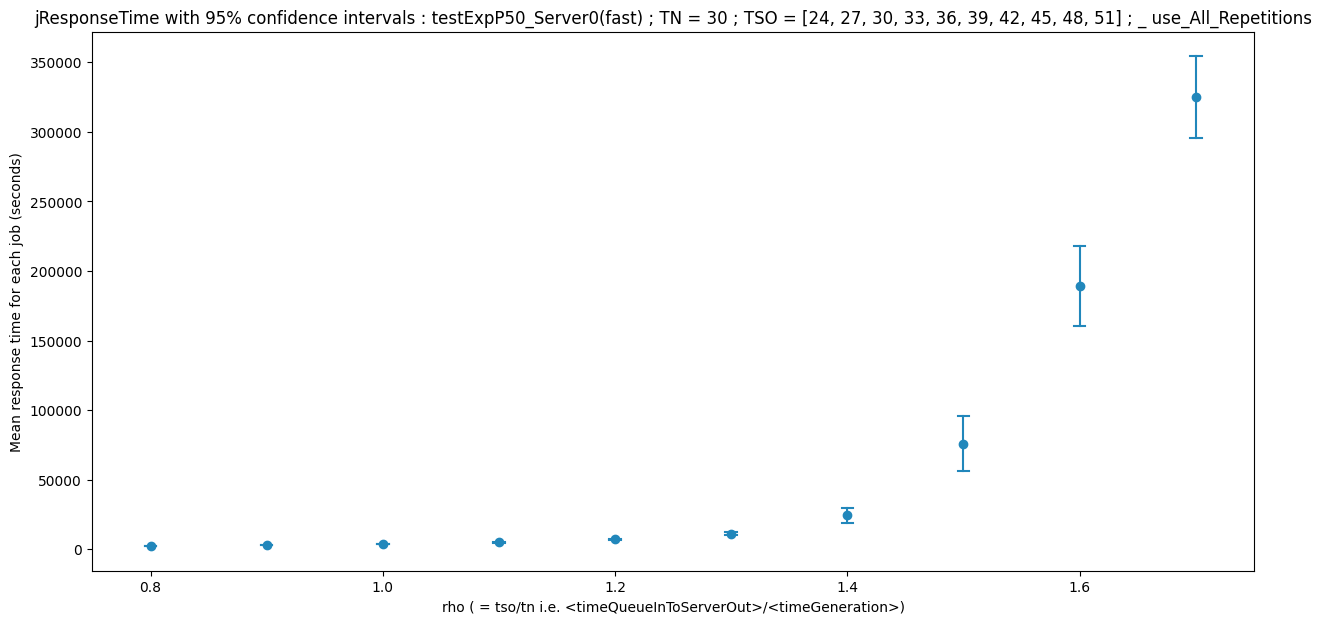

this_mean :  3533.85205896943
this_mean :  4330.414883483821
this_mean :  5328.315150872624
this_mean :  6740.312600039946
this_mean :  8995.192334179996
this_mean :  13319.512983678398
this_mean :  26637.807495486966
this_mean :  78544.29316767765
this_mean :  192103.35302916227
this_mean :  327787.018249737


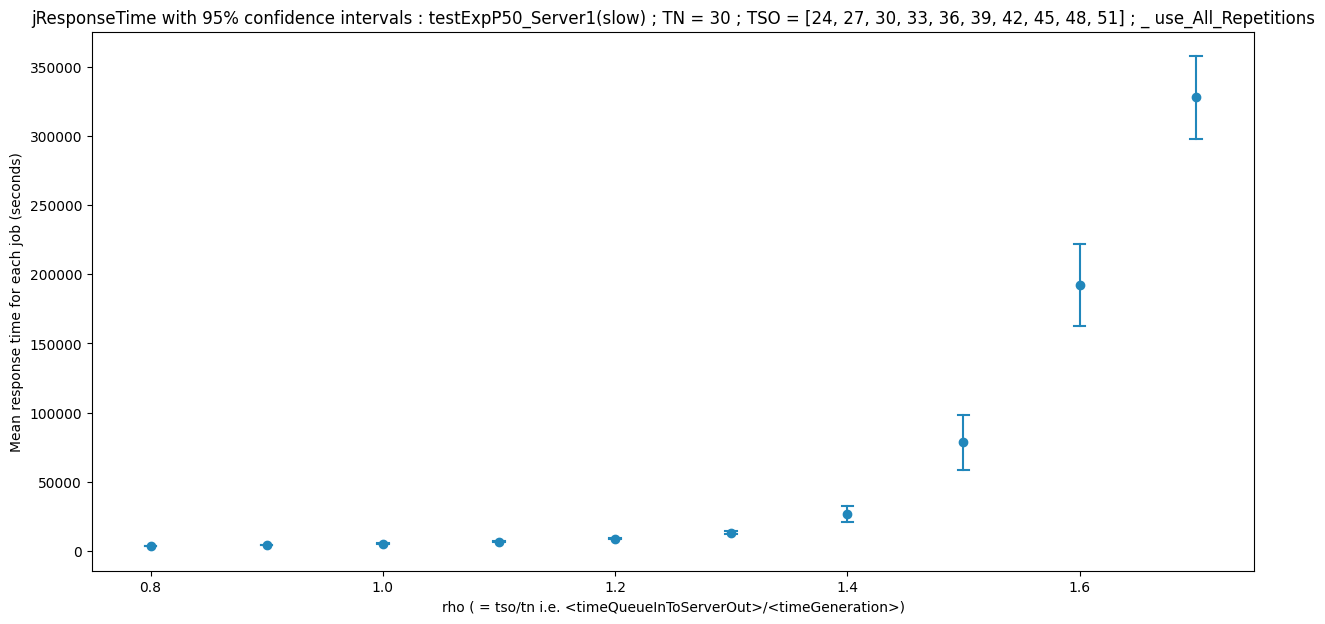

In [33]:
#	we studying completed job mean time !
#	#	r1 = "scalar"
#	#	r2 = "J_Network.server_"
#	#	r3 = "completedJob:mean"

plot_dir = f'../images/plots' 

for srvn in range(0, len(server_names)):
	plt.rcParams["figure.figsize"] = (15, 7)
	for tso_this_iter in range(0, len(target_tso), 1) :
		this_tso_averages = general_array[srvn][tso_this_iter]
		#	print(this_tso_averages)
		#	print("tipo di this_tso_averages : ", type(this_tso_averages))
		#	print("tipo di this_tso_averages[0] : ", type(this_tso_averages[0]))
		#	print("tipo di target_tn : ", type(target_tn))
		#	#	tipo di this_tso_averages :  <class 'list'>
		#	#	tipo di this_tso_averages[0] :  <class 'float'>
		#	#	tipo di target_tn :  <class 'float'>
		this_mean , this_conf_int = plot_confidence_interval( float(target_tso[tso_this_iter])/float(target_tn) , np.array(this_tso_averages))
		print("this_mean : ", this_mean)
		#	print(this_conf_int)

	#	rho = np.linspace(0.05, 2, 100)
	#	rho = rho 
	#	plt.plot(rho, rho**2/(1-rho)   , color='r', label="rho^2/(1-rho)")
	#	plt.legend(loc="upper left")
		
	extras = ["fast", "slow"]
	name = f'jResponseTime with 95% confidence intervals : test{distribution}P{probability}_Server{srvn}({extras[srvn]})'
	if use_all == True: 
		plt.title(f"{name} ; TN = 30 ; TSO = {target_tso} ; _ use_All_Repetitions")
        

	plt.ylabel("Mean response time for each job (seconds)")
	plt.xlabel("rho ( = tso/tn i.e. <timeQueueInToServerOut>/<timeGeneration>)")
     
	save = False
	if save == True:
		if use_all == True: 
			plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}.png')
		else :
			plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}.png')
	
	plt.show()





In [34]:
print("before merge")
print(general_array[0][7])
print(general_array[1][7])

print(len(general_array[0][7]))
print(len(general_array[1][7]))

before merge
[30847.633052489, 36265.578369061, 41516.407346423, 30137.499763243, 69227.768140074, 23767.820753491, 52844.483865847, 109553.88509062, 40915.053661912, 37410.83170279, 63546.638627258, 130041.80096308, 21582.318657159, 26992.541439802, 87021.665962254, 69392.191150302, 44196.830446854, 48186.23723337, 84003.981469298, 257922.81368634, 116261.81420521, 125374.71248577, 37086.677591601, 48377.699490323, 114922.1992386, 89455.429471847, 40451.352241644, 56068.37464751, 227682.80409375, 111846.99146415]
[33497.802233836, 38079.976887931, 46420.182314255, 33274.319779543, 70935.152604317, 25848.393115005, 54039.106724895, 109459.49881828, 41320.966554382, 41344.962860294, 67254.693368601, 133843.73553173, 23178.024145436, 28333.592973941, 92888.873588491, 71633.529933747, 48541.779080698, 51649.76216685, 85319.593231522, 261327.74186218, 116169.64304409, 126645.67188639, 39646.78786373, 51275.198959414, 115627.69359896, 92946.721254791, 41776.542813596, 59737.185804574, 23578

# MERGE

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv


In [46]:
#   USE ESPONENTIAL OR CONSTANT
use_exp = True

if use_exp == True:
    distribution = "Exp"
elif use_exp == False:
    distribution = "Con"

#   target_tso = ["50"]
detailed = True
if detailed == True :
    target_tso = list(range(24, 51+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30
use_all = True

target_tn = 30


# PROBABILITY
probability = 50

In [47]:
print( len(target_tso) )

10


In [48]:
# merge servers

# scalar,J_Network.server_0,completedJob:mean

r1 = "scalar"
r2 = "J_Network.server_"
r3 = "completedJob:mean"
server_names = [0, 1]

merged_array = []

for tso_this_iter in range(0, len(target_tso), 1) :
    #   print(tso_this_iter)
    jrespTime_all_this_tso = []
    file_name_csv = f'testS3{distribution}P{probability}_{target_tso[tso_this_iter]}_mean.csv'

    for srvn in range(0, len(server_names)):
        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    #   print("hit row : ", row)
                    #   hit row :  ['testExpP50-0-20240111-20:04:46-18804', 'scalar', 'J_Network.server_0', 'completedJob:mean', '', '', '2386.8933293034', '', '', '', '', '', '', '', '']
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    
                    this_row_mean = float( rigaTarget[6] )

                    #   if tso_this_iter==7 :
                    #       print("server", srvn, " ;tso ", tso_this_iter, " ;mean :", this_row_mean)
                    
                    jrespTime_all_this_tso.append(this_row_mean)
                    
                    #   print("mean : ", this_row_mean , " ; repetitions_counter : ", repetitions_counter)
                    #   repetitions_counter += 1
                    
                    if use_all == False:
                        print("break")
                        break
        
    merged_array.append(jrespTime_all_this_tso)


In [49]:
print("after merge")
print(len(merged_array))
print(merged_array[7])
print(len(merged_array[7]))

after merge
10
[30847.633052489, 36265.578369061, 41516.407346423, 30137.499763243, 69227.768140074, 23767.820753491, 52844.483865847, 109553.88509062, 40915.053661912, 37410.83170279, 63546.638627258, 130041.80096308, 21582.318657159, 26992.541439802, 87021.665962254, 69392.191150302, 44196.830446854, 48186.23723337, 84003.981469298, 257922.81368634, 116261.81420521, 125374.71248577, 37086.677591601, 48377.699490323, 114922.1992386, 89455.429471847, 40451.352241644, 56068.37464751, 227682.80409375, 111846.99146415, 33497.802233836, 38079.976887931, 46420.182314255, 33274.319779543, 70935.152604317, 25848.393115005, 54039.106724895, 109459.49881828, 41320.966554382, 41344.962860294, 67254.693368601, 133843.73553173, 23178.024145436, 28333.592973941, 92888.873588491, 71633.529933747, 48541.779080698, 51649.76216685, 85319.593231522, 261327.74186218, 116169.64304409, 126645.67188639, 39646.78786373, 51275.198959414, 115627.69359896, 92946.721254791, 41776.542813596, 59737.185804574, 2357

In [50]:
sums_merg = []

#   #   #   #   scalar,J_Network.server_0,completedJob:sum (NO)
#   scalar,J_Network.sink_0,recvJob:sum
# merge servers

r1 = "scalar"
r2 = "J_Network.sink_"
r3 = "recvJob:sum"
server_names = [0, 1]

for tso_this_iter in range(0, len(target_tso), 1) :
    #   print(tso_this_iter)
    sums_jrespTime_all_this_tso = []
    file_name_csv = f'testS3{distribution}P{probability}_{target_tso[tso_this_iter]}_sum.csv'

    for srvn in range(0, len(server_names)):
        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                                        
                    this_row_sum = float( rigaTarget[6] )

                    #   if tso_this_iter==7 :
                    #       print("server", srvn, " ; tso ", tso_this_iter, " ; mean :", this_row_sum)
                    
                    sums_jrespTime_all_this_tso.append(this_row_sum)
                                      
                    if use_all == False:
                        print("break")
                        break
        
    sums_merg.append(sums_jrespTime_all_this_tso)


In [51]:
print("after merge")
print(len(sums_merg))
print(sums_merg[7])
print(len(sums_merg[7]))

after merge
10
[1848.0, 1810.0, 1859.0, 1850.0, 1899.0, 1862.0, 1871.0, 1887.0, 1893.0, 1864.0, 1827.0, 1896.0, 1823.0, 1819.0, 1881.0, 1823.0, 1891.0, 1834.0, 1824.0, 1779.0, 1881.0, 1898.0, 1905.0, 1860.0, 1886.0, 1776.0, 1825.0, 1827.0, 1792.0, 1883.0, 928.0, 928.0, 926.0, 1007.0, 973.0, 913.0, 956.0, 919.0, 947.0, 952.0, 879.0, 914.0, 997.0, 921.0, 921.0, 966.0, 917.0, 911.0, 920.0, 936.0, 930.0, 933.0, 976.0, 887.0, 960.0, 887.0, 912.0, 962.0, 911.0, 931.0]
60


In [52]:
weighted_merge = []
for tso_this_iter in range(0, len(target_tso), 1) :
    it = 0
    #   print(len (sums_merg[tso_this_iter]) )
    #   print(len (merged_array[tso_this_iter]) )
    merge_this_tso = []
    while it < num_iterations :
        prod_s0 = sums_merg[tso_this_iter][it] * merged_array[tso_this_iter][it]
        prod_s1 = sums_merg[tso_this_iter][it+num_iterations] * merged_array[tso_this_iter][it+num_iterations]
        num_jobs_both_servers = sums_merg[tso_this_iter][it] + sums_merg[tso_this_iter][it+num_iterations]

        weighted_avg = ( prod_s0 + prod_s1 ) / num_jobs_both_servers
        
        #   if tso_this_iter == 7 :
        #       print(f'it_{it} : ({sums_merg[tso_this_iter][it]}*{merged_array[tso_this_iter][it]})+({sums_merg[tso_this_iter][it+num_iterations]}*{merged_array[tso_this_iter][it+num_iterations]}) = {prod_s0 + prod_s1} , avg = {weighted_avg}' )
        
        merge_this_tso.append(weighted_avg)

        it += 1
    weighted_merge.append(merge_this_tso)

# 1872.0 * 2880.0 , 1894.0 * 2880.0 -> 
    

In [53]:
print(weighted_merge)
print( len(weighted_merge ))
print( len(weighted_merge[7] ))

[[2653.991524460418, 2741.054771656374, 2832.1148840631945, 2597.409647346342, 2718.9461474089617, 2503.934879496376, 2847.4841502462864, 2755.5611582300794, 2663.1623537702403, 2709.211402958764, 2916.1707648541255, 2823.539685439528, 2543.0270670625396, 2677.0260476017675, 2881.795654557951, 2723.1202139285756, 2619.2786021163947, 2672.6751335268214, 2963.858110335211, 3111.1506967632035, 2767.4366120540385, 2774.7672559027956, 2566.6524380423075, 2753.934420057106, 2756.5053598311483, 2708.5533704906197, 2791.5588826676158, 2714.5610259878968, 3081.925264005606, 2720.453740715044], [3229.0517780575665, 3281.1578096446824, 3291.3172598707583, 3145.066742228439, 3549.312573179269, 3196.8921722401756, 3597.8284612948464, 3446.930412743359, 3279.3300303030105, 3378.3245398167446, 3623.380555635579, 3434.3397161002154, 3166.209201187548, 3247.0636231831186, 3767.553008564595, 3564.981669878626, 3206.11795944993, 3267.3956931735797, 3636.8523559203677, 4282.8882593601265, 3606.88203908678

In [54]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    #   plt.plot( [x,x] , [top, top] , color = '#052BFF')

    return mean, confidence_interval

tso_this_iter :  24  ; this_mean :  2753.0287088525783
tso_this_iter :  27  ; this_mean :  3459.5841854031173
tso_this_iter :  30  ; this_mean :  4387.675307136619
tso_this_iter :  33  ; this_mean :  5684.105940762075
tso_this_iter :  36  ; this_mean :  7820.137725400642
tso_this_iter :  39  ; this_mean :  11981.371627221526
tso_this_iter :  42  ; this_mean :  25103.90972204597
tso_this_iter :  45  ; this_mean :  76694.1487542752
tso_this_iter :  48  ; this_mean :  190190.7765981627
tso_this_iter :  51  ; this_mean :  325936.9857610515


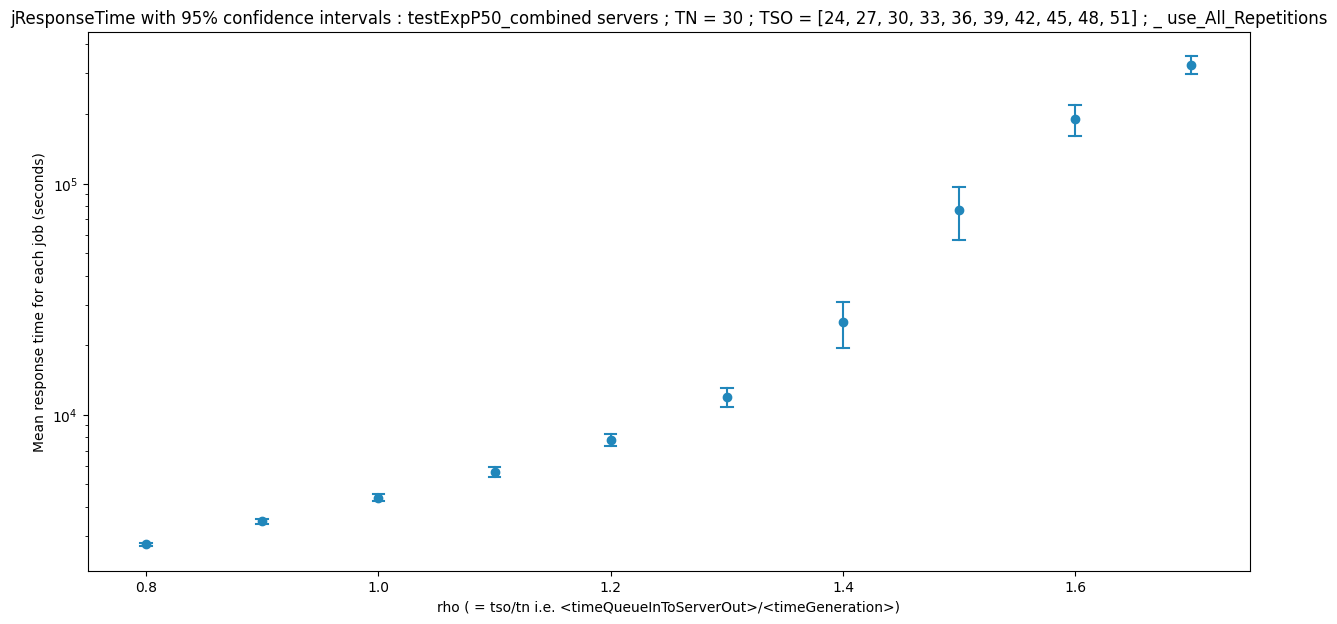

In [55]:


plot_dir = f'../images/plots' 

plt.rcParams["figure.figsize"] = (15, 7)
for tso_this_iter in range(0, len(target_tso), 1) :
    this_tso_averages = weighted_merge[tso_this_iter]
    #	print(this_tso_averages)
    #	print("tipo di this_tso_averages : ", type(this_tso_averages))
    #	print("tipo di this_tso_averages[0] : ", type(this_tso_averages[0]))
    #	print("tipo di target_tn : ", type(target_tn))
    #	#	tipo di this_tso_averages :  <class 'list'>
    #	#	tipo di this_tso_averages[0] :  <class 'float'>
    #	#	tipo di target_tn :  <class 'float'>
    this_mean , this_conf_int = plot_confidence_interval( float(target_tso[tso_this_iter])/float(target_tn) , np.array(this_tso_averages))
    print("tso_this_iter : ", target_tso[tso_this_iter], " ; this_mean : ", this_mean)
    #	print(this_conf_int)

#	rho = np.linspace(0.05, 2, 100)
#	rho = rho 
#	plt.plot(rho, rho**2/(1-rho)   , color='r', label="rho^2/(1-rho)")
#	plt.legend(loc="upper left")
    
extras = ["fast", "slow"]
name = f'jResponseTime with 95% confidence intervals : test{distribution}P{probability}_combined servers'
if use_all == True: 
    plt.title(f"{name} ; TN = 30 ; TSO = {target_tso} ; _ use_All_Repetitions")
    

plt.ylabel("Mean response time for each job (seconds)")
plt.xlabel("rho ( = tso/tn i.e. <timeQueueInToServerOut>/<timeGeneration>)")
    
save = False
if save == True:
    if use_all == True: 
        plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}.png')
    else :
        plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}.png')


use_log = True
if use_log :
    plt.yscale('log')
plt.show()


( 3150*2 + 5400 ) / 3 = 3900

formula era : 13/9 * tso = 13/9 * 45*60 = 3900 nice :>